<a href="https://colab.research.google.com/github/santhoshreddy03/Churn-Prediction/blob/main/churn_prediction_using_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.2 MB/s eta 0:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pycaret

In [ ]:
dataset = pd.read_excel('/customer_churn_large_dataset.xlsx')

In [ ]:
dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
dataset.shape

(100000, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
dataset.drop(['CustomerID','Name'],axis=1,inplace=True)

In [ ]:
dataset.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

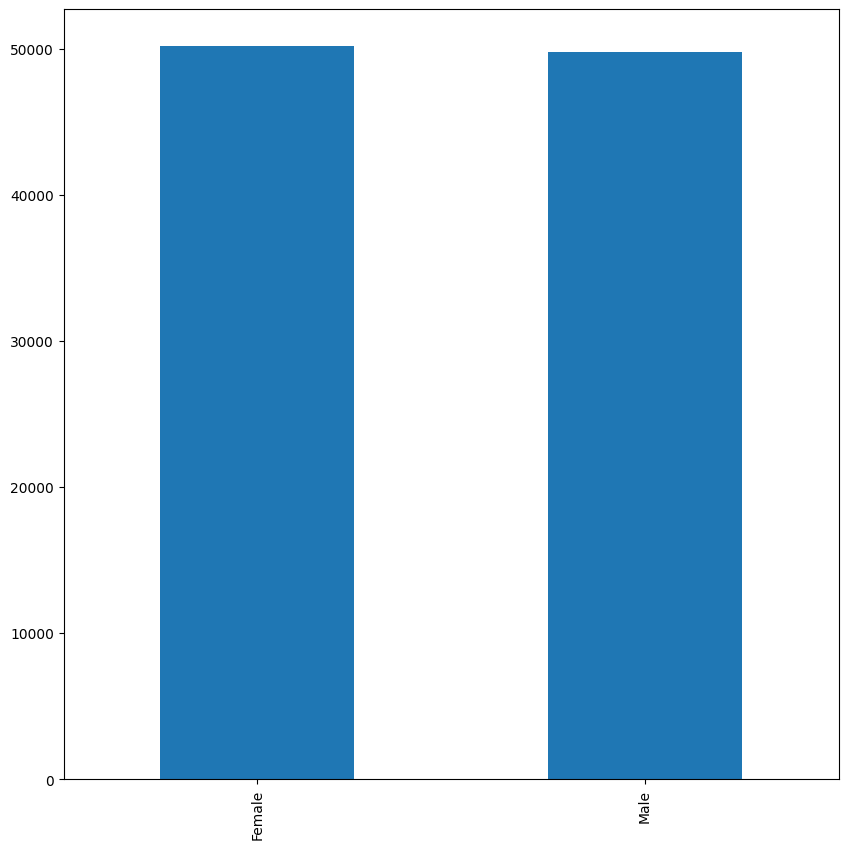

In [ ]:
dataset['Gender'].value_counts().plot(kind='bar',figsize=(10,10))

In [ ]:
dataset['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

<Axes: >

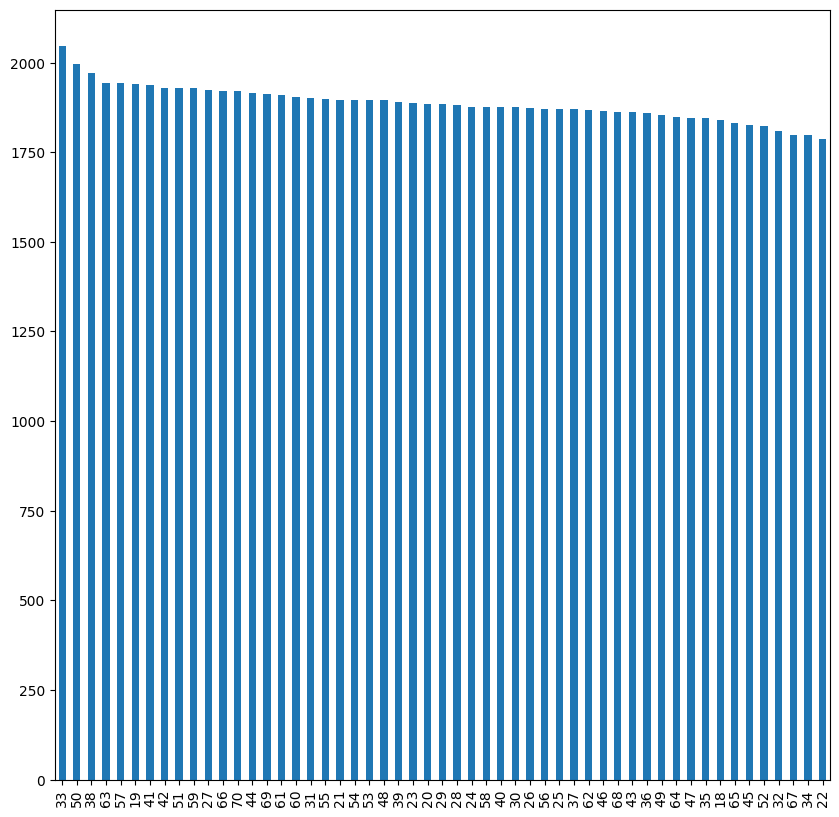

In [ ]:
dataset['Age'].value_counts().plot(kind='bar',figsize=(10,10))

In [ ]:
dataset['Age'].value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [ ]:
obj=['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn']
for i in obj:
    print(i, len(dataset[i].unique()))

Age 53
Gender 2
Location 5
Subscription_Length_Months 24
Monthly_Bill 7001
Total_Usage_GB 451
Churn 2


In [ ]:
dataset['Gender'].replace('Male',0,inplace=True)
dataset['Gender'].replace('Female',1,inplace=True)

In [ ]:
dataset=pd.get_dummies(dataset)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Location_Chicago            100000 non-null  uint8  
 7   Location_Houston            100000 non-null  uint8  
 8   Location_Los Angeles        100000 non-null  uint8  
 9   Location_Miami              100000 non-null  uint8  
 10  Location_New York           100000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 5.1 MB


In [ ]:
correlation=dataset.corr()

<Axes: >

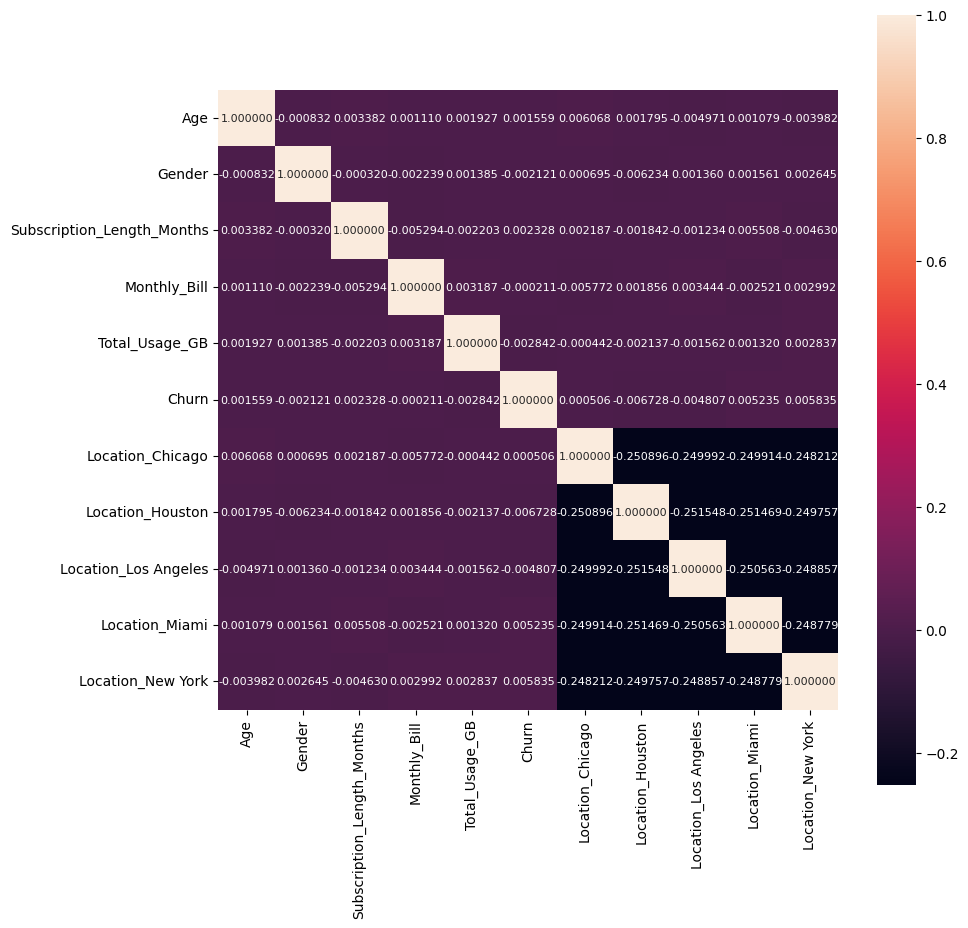

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='1f',annot_kws={'size':8},annot = True)

In [ ]:
dataset.corr()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
Age,1.000000,-0.000832,0.003382,0.001110,0.001927,0.001559,0.006068,0.001795,-0.004971,0.001079,-0.003982
Gender,-0.000832,1.000000,-0.000320,-0.002239,0.001385,-0.002121,0.000695,-0.006234,0.001360,0.001561,0.002645
Subscription_Length_Months,0.003382,-0.000320,1.000000,-0.005294,-0.002203,0.002328,0.002187,-0.001842,-0.001234,0.005508,-0.004630
Monthly_Bill,0.001110,-0.002239,-0.005294,1.000000,0.003187,-0.000211,-0.005772,0.001856,0.003444,-0.002521,0.002992
Total_Usage_GB,0.001927,0.001385,-0.002203,0.003187,1.000000,-0.002842,-0.000442,-0.002137,-0.001562,0.001320,0.002837
Churn,0.001559,-0.002121,0.002328,-0.000211,-0.002842,1.000000,0.000506,-0.006728,-0.004807,0.005235,0.005835
Location_Chicago,0.006068,0.000695,0.002187,-0.005772,-0.000442,0.000506,1.000000,-0.250896,-0.249992,-0.249914,-0.248212
Location_Houston,0.001795,-0.006234,-0.001842,0.001856,-0.002137,-0.006728,-0.250896,1.000000,-0.251548,-0.251469,-0.249757
Location_Los Angeles,-0.004971,0.001360,-0.001234,0.003444,-0.001562,-0.004807,-0.249992,-0.251548,1.000000,-0.250563,-0.248857
Location_Miami,0.001079,0.001561,0.005508,-0.002521,0.001320,0.005235,-0.249914,-0.251469,-0.250563,1.000000,-0.248779


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Location_Chicago            100000 non-null  uint8  
 7   Location_Houston            100000 non-null  uint8  
 8   Location_Los Angeles        100000 non-null  uint8  
 9   Location_Miami              100000 non-null  uint8  
 10  Location_New York           100000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 5.1 MB


In [ ]:
dataset.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,0,1
2,24,1,5,85.47,460,0,0,0,1,0,0
3,36,1,3,97.94,297,1,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,0,1,0


In [ ]:
X=dataset.drop('Churn',axis=1)
y=dataset['Churn']

In [ ]:
X.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,0,1,0,0
1,62,1,1,48.76,172,0,0,0,0,1
2,24,1,5,85.47,460,0,0,1,0,0
3,36,1,3,97.94,297,0,0,0,1,0
4,46,1,19,58.14,266,0,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75000, 10), (25000, 10), (75000,), (25000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report,auc

In [ ]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['KNN Classifier' ] = KNeighborsClassifier ()
model_dict[ 'Decision Tree Classifier' ] = DecisionTreeClassifier (random_state=49)
model_dict ['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict ['AdaBoost Classifier' ] = AdaBoostClassifier (random_state=49)
model_dict ['Gradient Boosting Classifier' ] = GradientBoostingClassifier (random_state=49)
model_dict ['XGB Classifier'] = XGBClassifier (random_state=49)

In [ ]:
def model_test (X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict (X_test)
    accuracy = accuracy_score (y_test,y_pred)
    print('====================================={}======================================='.format(model_name))
    print('Score is : {}'.format (accuracy))
    print()

In [ ]:
for model_name, model in model_dict.items ():
    model_test(X_train, X_test, y_train, y_test, model,model_name)

=====================================Logistic regression=======================================
Score is : 0.49976

=====================================KNN Classifier=======================================
Score is : 0.50036

=====================================Decision Tree Classifier=======================================
Score is : 0.49908

=====================================Random Forest Classifier=======================================
Score is : 0.49384

=====================================AdaBoost Classifier=======================================
Score is : 0.49812

=====================================Gradient Boosting Classifier=======================================
Score is : 0.50028

=====================================XGB Classifier=======================================
Score is : 0.50132



In [ ]:
dataset['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [ ]:
from pycaret.classification import *
s = setup(dataset, target = 'Churn')


,Description,Value
0,Session id,7849
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(100000, 11)"
4,Transformed data shape,"(100000, 11)"
5,Transformed train set shape,"(70000, 11)"
6,Transformed test set shape,"(30000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
exp.setup(dataset, target = 'Churn')

,Description,Value
0,Session id,4122
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(100000, 11)"
4,Transformed data shape,"(100000, 11)"
5,Transformed train set shape,"(70000, 11)"
6,Transformed test set shape,"(30000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5060,0.5039,0.4072,0.5048,0.4507,0.0112,0.0114,0.1280
lr,Logistic Regression,0.5039,0.5031,0.3648,0.5026,0.4208,0.0065,0.0069,0.7440
ridge,Ridge Classifier,0.5037,0.0000,0.3899,0.5020,0.4388,0.0063,0.0066,0.1180
lda,Linear Discriminant Analysis,0.5037,0.5028,0.3899,0.5020,0.4388,0.0063,0.0065,0.2490
dummy,Dummy Classifier,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2410
lightgbm,Light Gradient Boosting Machine,0.5020,0.5001,0.4252,0.4998,0.4594,0.0034,0.0034,3.4120
ada,Ada Boost Classifier,0.5017,0.5006,0.4012,0.4994,0.4447,0.0024,0.0025,2.0700
gbc,Gradient Boosting Classifier,0.5017,0.5010,0.3980,0.4994,0.4428,0.0025,0.0025,7.0530
svm,SVM - Linear Kernel,0.5016,0.0000,0.2020,0.1500,0.1403,0.0006,0.0018,3.6580
xgboost,Extreme Gradient Boosting,0.5008,0.5017,0.4846,0.4985,0.4914,0.0014,0.0014,5.2750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5056,0.0000,0.4250,0.5042,0.4609,0.0105,0.0107,0.1340
lda,Linear Discriminant Analysis,0.5056,0.5050,0.4250,0.5042,0.4608,0.0105,0.0106,0.2480
nb,Naive Bayes,0.5051,0.5055,0.4979,0.5031,0.4993,0.0101,0.0102,0.2400
lr,Logistic Regression,0.5046,0.5050,0.4195,0.5031,0.4571,0.0085,0.0086,0.3070
ada,Ada Boost Classifier,0.5025,0.5000,0.4077,0.5003,0.4492,0.0041,0.0041,1.9770
gbc,Gradient Boosting Classifier,0.5025,0.4999,0.4086,0.5003,0.4498,0.0041,0.0042,7.3410
dummy,Dummy Classifier,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
knn,K Neighbors Classifier,0.5014,0.5022,0.4972,0.4991,0.4981,0.0028,0.0028,0.7830
lightgbm,Light Gradient Boosting Machine,0.5014,0.5007,0.4213,0.4990,0.4568,0.0021,0.0021,3.1080
dt,Decision Tree Classifier,0.5010,0.5010,0.4984,0.4988,0.4986,0.0021,0.0021,0.5640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=4122, solver='auto',
                tol=0.0001)